# Some predictions and plots

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sys
from importlib import reload

import greyboxmodels.bbmcpsmodels.creator as creator
import greyboxmodels.bbmcpsmodels.cyber.OPF as opf_bbm

# Set the working directory
os.chdir("D:/projects/IPTLC_BBMs/")
print(f"Working directory: {os.getcwd()}")

Working directory: D:\projects\IPTLC_BBMs


In [2]:
# Check GPU availability
device = creator.get_device()
print(device)

cuda:0


In [4]:
# Open the gt data
input_data = np.load("data/PF/20240227_195448/gt_inputs_minmax_normalized.npy")
output_data = np.load("data/PF/20240227_195448/gt_outputs_minmax_normalized.npy")

# tensorize the data
input_data = torch.from_numpy(input_data).float().to(device)
output_data = torch.from_numpy(output_data).float().to(device)

# Shape of the data
input_size = input_data.shape[1]
output_size = output_data.shape[1]
print(f"Input data shape: {input_size}")
print(f"Output data shape: {output_size}")

Input data shape: 56
Output data shape: 105


In [5]:
# Load the model
bbm1 = opf_bbm.BBM1_SimpleNet(input_size, output_size)
bbm1.load_state_dict(torch.load("models\BBM1_SimpleNet_MinMaxNormalizedPF_20240228-154711.pt"))
bbm1.to(device)
bbm1.eval()


BBM1_SimpleNet(
  (fc1): Linear(in_features=56, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=105, bias=True)
  (dropout): Dropout(p=0.15, inplace=False)
)

In [6]:
# Predictions
pred_inputs = bbm1(input_data)

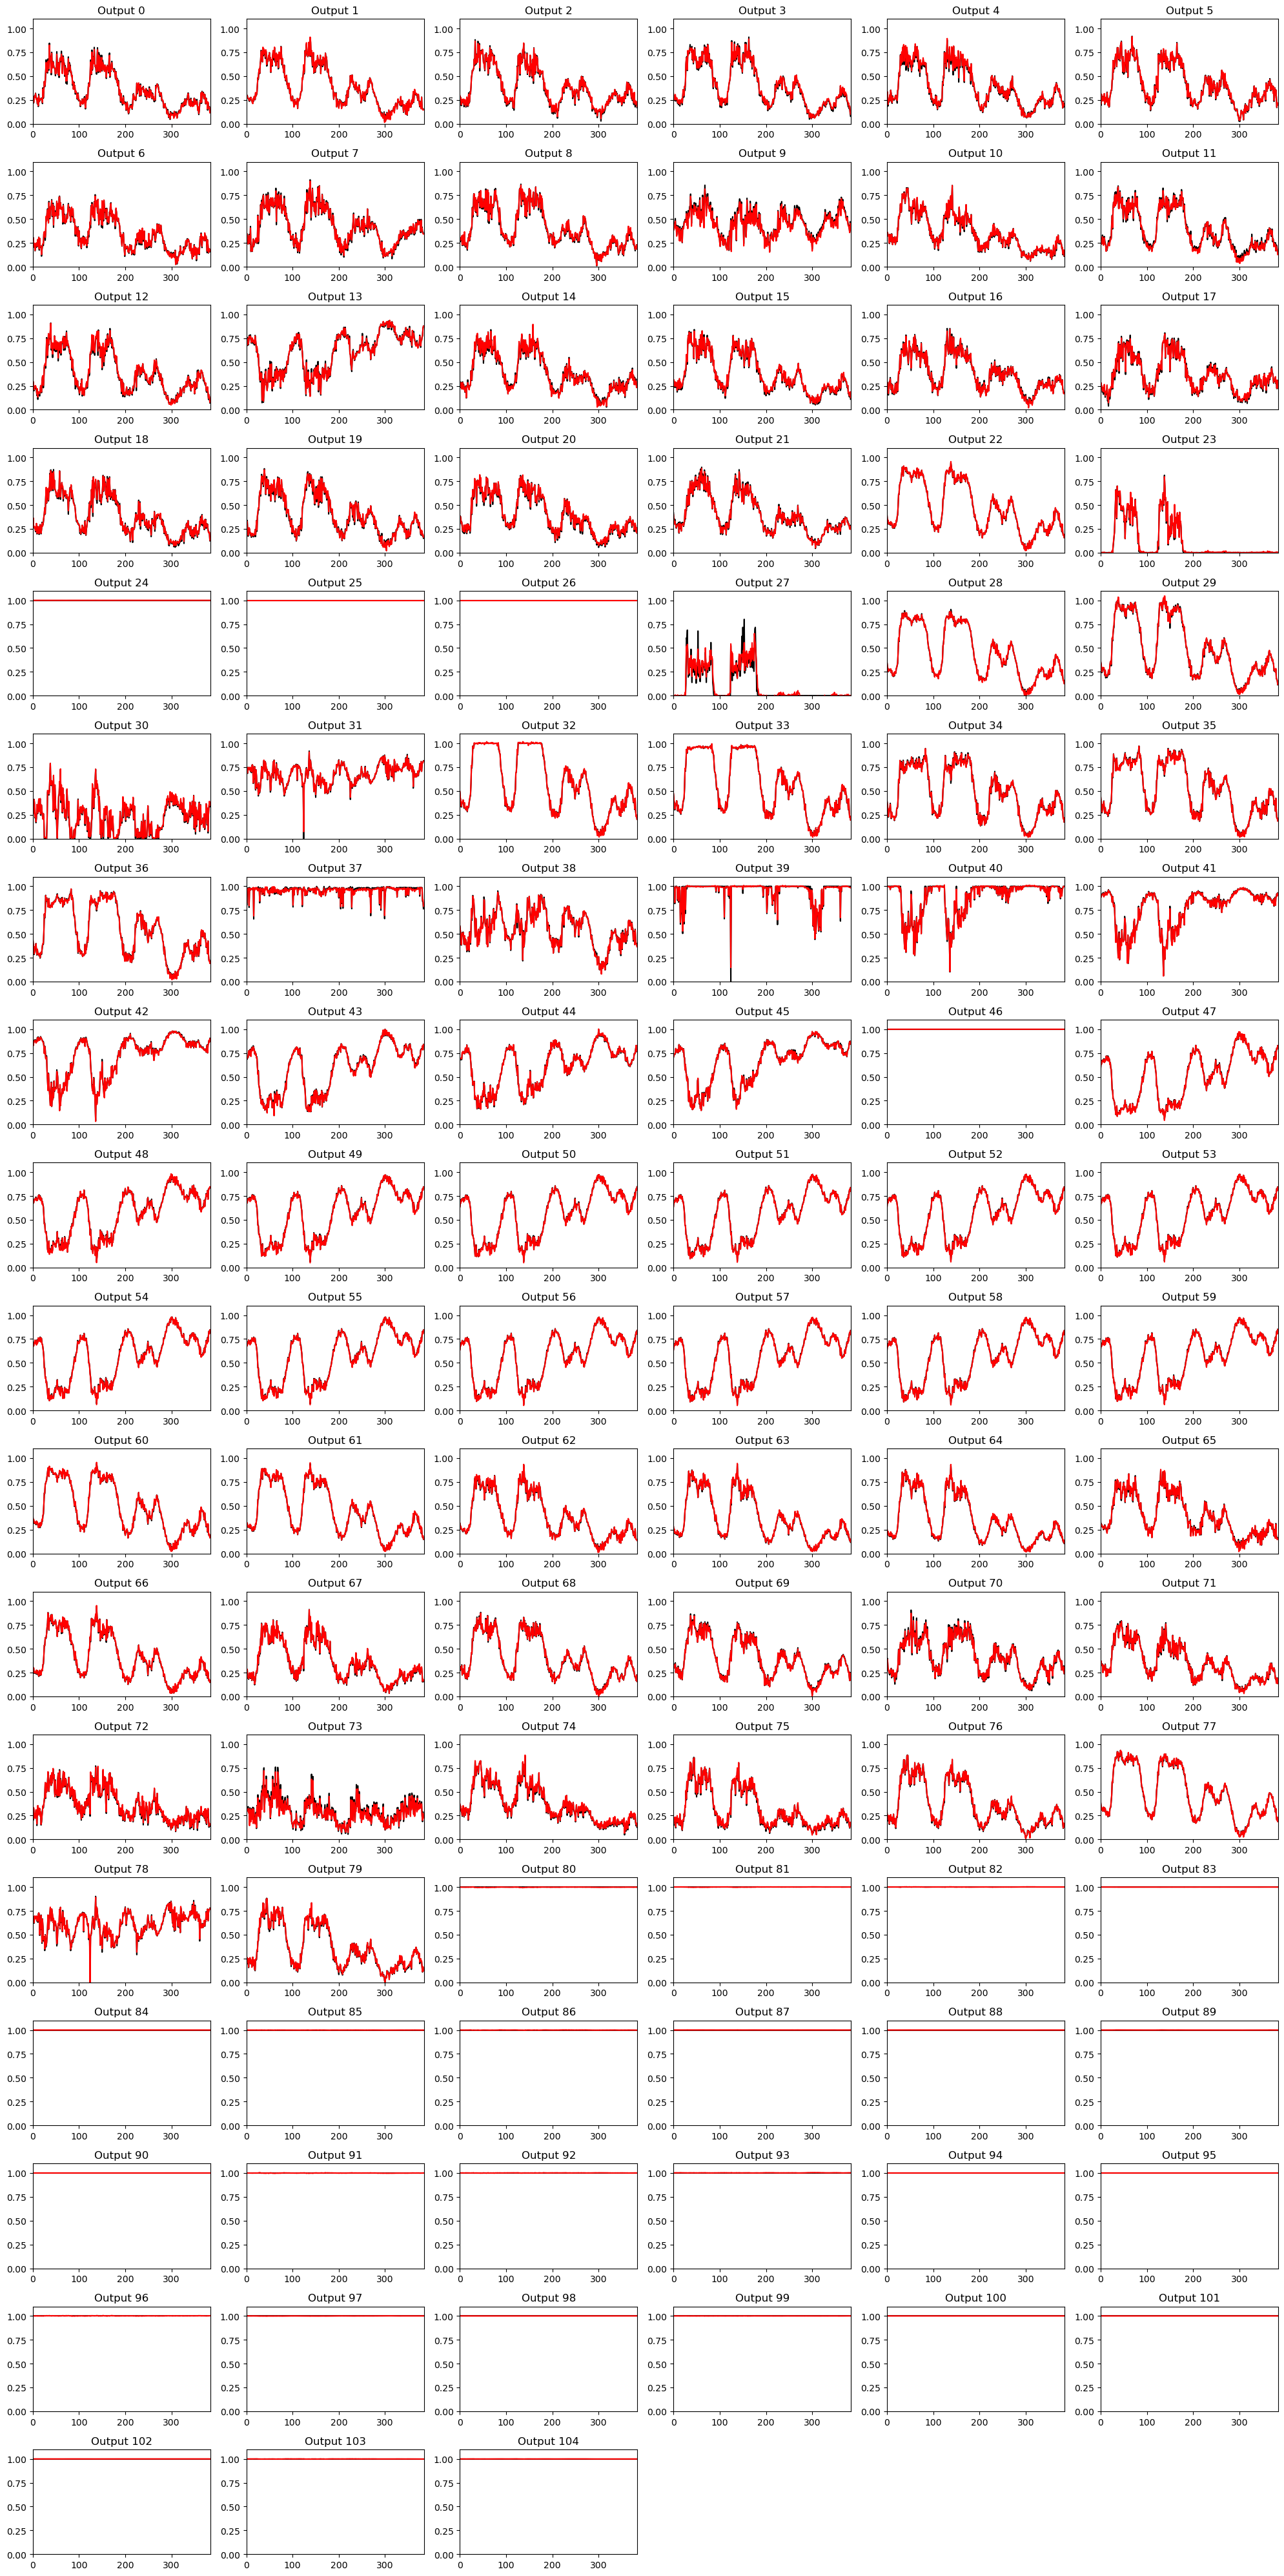

In [17]:
# Plot the predictions versus the ground truth
# Obtain the size of the output. THen, create an equal number of subplots and plot predictions versus ground truth in each subplot
output_size = output_data.shape[1]

# Calculate a nice number of rows and columns for the subplots
figsize = (20, 40)
cols = 6
rows = int(np.ceil(output_size / cols))

# Create the figure
fig, axs = plt.subplots(rows, cols, figsize=figsize)
axs = axs.flatten()

# Plot the predictions versus the ground truth
for i in range(rows * cols):
    # Delete the axis if there is no data to plot
    if i >= output_size:
        axs[i].axis("off")
        continue

    # Plot the prediction versus the ground truth
    axs[i].plot(output_data[:, i].cpu().detach().numpy(), label="Ground truth", color="black")
    axs[i].plot(pred_inputs[:, i].cpu().detach().numpy(), label="Prediction", color="red")
    axs[i].set_title(f"Output {i}")
    axs[i].set_xlim(0, len(output_data))

    # y ticks
    axs[i].set_ylim(0, 1.1)
    axs[i].set_yticks([0, 0.25, 0.5, 0.75, 1])
+
fig.tight_layout()

In [12]:
fig.tight_layout()
fig.show()

C:\Users\Juan-Pablo Futalef\AppData\Local\Temp\ipykernel_39852\719687704.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [14]:
plt.show()